# załadowanie danych

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
db_markets = pd.read_csv('supermarket_sales - Sheet1.csv')
db_markets.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
#dodaje kolumny miesiecy godzin oraz dni
db_markets['Date']
db_markets['Month']=db_markets['Date'].apply(lambda x :x.split('/')[0])
db_markets['Day']=db_markets['Date'].apply(lambda x :x.split('/')[1])
db_markets['Hour']=db_markets['Time'].apply(lambda x :x.split(':')[0])

db_markets

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,29,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,2,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2,9,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2,22,15


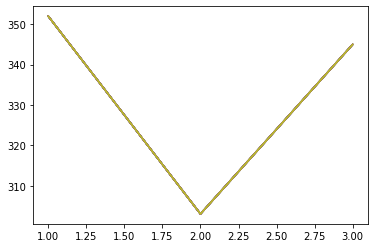

In [33]:
#sprawdzenie sprzedaży po miesiącach
month_results=db_markets.groupby('Month').count()

months=range(1,4)
plt.plot(months,month_results)

plt.show()

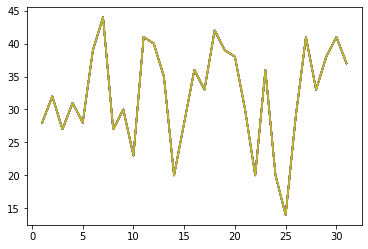

In [37]:
#sprawdzanie po dniach
day_results=db_markets.groupby('Day').count()
days=range(1,32)
plt.plot(days,day_results)

plt.show()

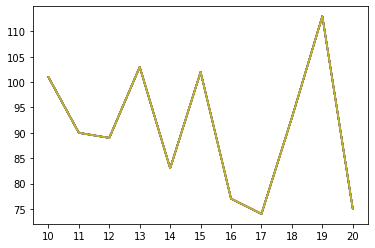

In [38]:
#sprawdzanie po godzinach

hour_results=db_markets.groupby('Hour').count()
hours=[hour for hour, df in db_markets.groupby('Hour')]
plt.plot(hours,hour_results)

plt.show()

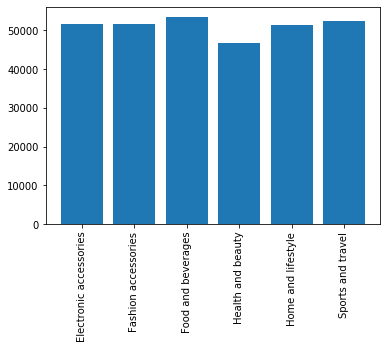

In [62]:
# najbardziej dochodowy product line

db_markets['all_purchases']=db_markets['Unit price']*db_markets['Quantity']
results=db_markets.groupby('Product line')['all_purchases'].sum()
results

product_lines=[product_line for product_line, df in db_markets.groupby('Product line')]



plt.bar(product_lines,results)
plt.xticks(product_lines,rotation='vertical')

plt.show()

In [58]:
results


Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: all_purchases, dtype: float64